# co5bold data - anteckningar

- i teststjärnan ['Z'][0][0]:
    substructure FUL.Z contains the original data arrays from the model file like the spatial axes, density rho, internal energy ei, and the three spatial components of the velocity (v1, v2, v3):

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

     34 - densitet i g/cm3! 317**3 antal celler

     37 - internal energy erg/g - för att göra om till temperaturer? Behövs ej för Bernd har redan gjort det.

- teststar['EOS'][0][0]: Equation of state

    [0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

    [1] - är 317 x 317 x 317 stor matris med värden mellan 691 och 50441

    Dessa är nog temperaturerna som Bernd har räknat ut åt mig!

    Tstar = teststar['EOS'][0][0][1][x][y][z]

- teststar['OPA']: opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

    ['OPA'][0][0][0] är en 317**3 array.
    
    Så den är rumsberoende, men itne våglängdberoende? > grå kropp

    ['OPA'][0][0][0][x][y][z]

    Dessa kan jag avrunda till en handfull konstantet.

    s 42 i c5d-manualen säger att delta tau = kappa * rho * deltax vilket "imply'ar" att kappa har enheten cm2/g, dvs är massabsorption.

- ['PAR'] - har info om själva beräkningstid etc, inställningar

    ['PAR'][0][0][2] Är stjärnans detaljer:

```py
    [b'Parameter file for RHD code:'
    b'3D grey dust-free AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun'
    b'Start model st28gm06n043_300.end with 317^3 points'
    b'New code version 2020-07-04: MPI+OpenMP'
    b'Increase envelope mass gradually to 0.2 M_sun']
```
Notera: 355Rsun ~ 1.651 AU

Och Grid'et i detta testobjektet är 2 * 3.65AU stort.

- Diverse data

```py
# Size of grid
print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
print(teststar['Z'][0][0][4])

# Total time(?)
print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")
```


In [19]:
# Notebook for exploring the data insize the sav-file

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
# st28gm06n052_186.sav
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)
print('\n\n')

print(teststar['OPA'])



('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')



[rec.array([(array([[[0.0006049 , 0.00060659, 0.00060921, ..., 0.00047209,
         0.00046558, 0.00046406],
        [0.00060768, 0.00060912, 0.00061161, ..., 0.00046288,
         0.00045556, 0.00045286],
        [0.00061107, 0.00061268, 0.0006149 , ..., 0.00047399,
         0.0004661 , 0.00046265],
        ...,
        [0.0007123 , 0.0007172 , 0.00072147, ..., 0.00076428,
         0.00075889, 0.00075496],
        [0.00070279, 0.00070707, 0.0007106 , ..., 0.00075953,
         0.00075437, 0.00075067],
        [0.00072682, 0.00073219, 0

In [3]:
# Ongoing stuff
# Load opacities

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
teststar = teststar['ful']

# Dict-columns
#print(teststar.dtype.names)

#nn=0

#print(teststar['OPA'][0][0][0][0][0][0])
#print(np.shape(teststar['OPA'][0][0][nn]))
#print(np.max(teststar['EOS'][0][0][1]))

# Size of the grid
nc5dedge = np.size(teststar['Z'][0][0][16])


# move opacities to array
c5dstar_opacities = np.zeros((nc5dedge,nc5dedge,nc5dedge))

for nx in range(nc5dedge):
    for ny in range(nc5dedge):
        for nz in range(nc5dedge):
            c5dstar_opacities[nx,ny,nz] = teststar['OPA'][0][0][0][nx][ny][nz]


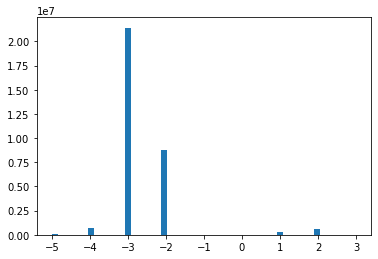

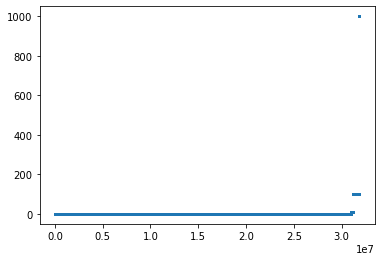

In [4]:
# study opacities

opac1d = c5dstar_opacities.ravel()

import matplotlib.pyplot as plt

# Approximate to factor tens
opac1d = 10**np.round(np.log10(opac1d))

plt.figure(1)
plt.hist(np.log10(opac1d), bins=50);

plt.figure(2)
plt.plot(np.sort(opac1d),'.',markersize=1)

# problemet kvarstår att jag har bara "ett värde" här per cell
# det ska ju vara ett våglängdsberoende, så vad är detta kappa?

# annars, till senare
# översätt 3d-arrayen till r3d-data-lista i r3d-gridet
# gör denna avrudningen fast i r3d-listan istället
# tack vare listorna med griddistances så vet jag vilken cell som är vilken ju
# då kan jag använda detta för att dela upp listan i dust_densities_star.inp's
# till flera olika species
# > i en specie så är det 0 g/cm3 i de celler där en annan specie huserar.



In [5]:
# Create grids to translate data into and explore the 3D distributions

# Create r3d-grid to use for my tests
# in case I need a grid with cellsizes in relation to c5d cellsizes

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import analyze_co5bold_functions as a5d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load all necessary details from c5d-data
c5dgrid = a5d.load_grid_coordinates()
nc5dedge = np.size(c5dgrid[:,0])
nc5dcube = nc5dedge**3

c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()


# Set settings for new grid, in this specific case:
# (normally, plot and check the density distribution against R)
# (or later, just use the same size of the grid, set some good refinement
#  limits)
# 6AU side (the star seems to end at R=2AU so 3AU is good enough for this test)
# smallest grid cells are c5dcellsize > basecells are c5dcellsize*2**4
#r3dedge = 2*5*AUcm
#nxyz = 10
#refinementlist = [0.8*r3dedge,0.6*r3dedge,0.4*r3dedge,0.2*r3dedge]
#refinementlist_au = [refs/AUcm for refs in refinementlist]

# Use these for adapting cell sizes to c5d cell sizes
r3dedge = 2 * 3.5 * AUcm
basecell = c5dcellsize*1.1 * 2**4
nxyz = r3dedge/basecell
refinementlist_au = [3.5,2.9,2.3,1.7]
refinementlist = [refs*AUcm for refs in refinementlist_au]

# Create new smaller grid
# Mind that create-grid function automatically adapts nxyz and gridedge so that
# nxyz is an even integer and cell sizes are kept as set in the initial settings
c3d.create_grid(r3dedge/AUcm, nxyz, refinementlist_au, savegrid=True)


Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.262420974257731 AU
Number of base cells along one side of the grid: 18
Distances to refinement limits from centrum: [3.5, 2.9, 2.3, 1.7] AU
Number refinements: 4
Size of base cell: 0.40346783190320734 AU
Child cell size 1: 0.20173391595160367 AU
Child cell size 2: 0.10086695797580184 AU
Child cell size 3: 0.05043347898790092 AU
Child cell size 4: 0.02521673949395046 AU
Writing amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Writing grid_info.txt
Create grid: done.



In [6]:
import analyze_co5bold_functions as a5d
a5d.create_star()

Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star: done.



/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:498: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


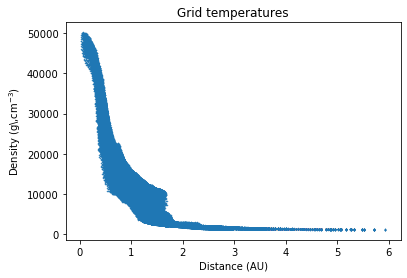

In [7]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

a3d.plot_temperature_radius(temperature_path='../dust_temperature_star.dat')



/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:379: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


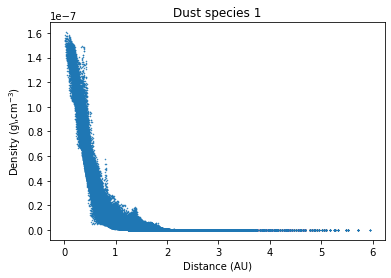

In [8]:
import analyze_r3d_functions as a3d

a3d.plot_onedensity_radius(density_path='../dust_density_star.inp')


# Test star creation

Creates a test star for rad-trans-sims with black/grey opacity.

In [1]:
# Create grid
import create_r3d_functions as c3d

# Smallest c5d cells are 2*3.65/317 AU = 0.023 AU
# Radius of star: 1.651AU (355 Rsun)
# Settings for the grid
AUcm = 1.49598e13 # cm
r3dedge = 2 * 3.65 * AUcm # Size of whole grid
basecell = 0.03*AUcm * 2**4 # Size of base cells (smallest being 0.03 AU)
nxyz = r3dedge/basecell
refinementlist_au = [3.65,2.9,2.4,1.9]
refinementlist = [refs*AUcm for refs in refinementlist_au]

c3d.create_grid(r3dedge/AUcm, nxyz, refinementlist_au, savegrid=True)

Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.679999999999999 AU
Number of base cells along one side of the grid: 16
Distances to outer refinement limits from centrum: [3.65, 2.9, 2.4, 1.9] AU
Distances to inner refinement limits from centrum: [0.38, 0.76, 1.1400000000000001, 1.52] AU
Number refinements: 4
Size of base cell: 0.48 AU
Child cell size 1: 0.24 AU
Child cell size 2: 0.12 AU
Child cell size 3: 0.06 AU
Child cell size 4: 0.03 AU
Writing amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Writing grid_info.txt
Create grid: done.



In [2]:
import analyze_co5bold_functions as a5d

a5d.create_star(
    savpath='../co5bold_data/dst28gm06n056/st28gm06n056_142.sav',
    amrpath='../r3dresults/duststar_tests_3/amr_grid.inp',
    gridpath='../r3dresults/duststar_tests_3/grid_distances.csv',
    sizepath='../r3dresults/duststar_tests_3/grid_cellsizes.csv'
)

Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star: done.



In [1]:
import numpy as np

testarray = np.zeros(20)
testarray[5:15] = np.random.random(10)

print(np.mean(testarray[np.where(testarray>0)[0]]))


0.4586231616377815


In [1]:
import analyze_co5bold_functions as a5d

a5d.create_staropacity(
    pathwavelength='../r3dresults/duststar_tests_4/wavelength_micron.inp',
    pathtemperature='../r3dresults/duststar_tests_4/dust_temperature_old.dat',
    nbins=5
)


Binning star to 5 species.
Temperature bin-ranges are: [4000.         3260.77447877 2521.54895754 1782.32343631 1043.09791508]
1: 0:735792 OPAC: 10.305085841676277
2: 735792:1471584 OPAC: 0.0015102957320791118
3: 1471584:2207376 OPAC: 0.000467666322266925
4: 2207376:2943168 OPAC: 0.002022923528811326
5: 2943168:3678960 OPAC: 0.003937829967149617
Writing new radmc3d-files
Writing opacity files for the binned star.
Done with: dust_density_star_opabins.inp, dust_temperature_star_opabins.inp, star_opacities_bins.dat, dustopac_starbins.inp, dustkappa_starX.inp


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:821: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


10147.756374009374


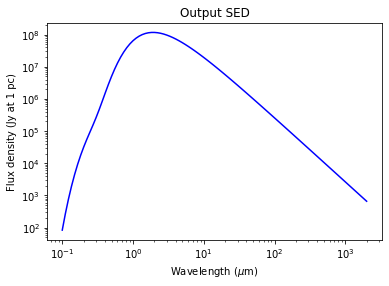

In [5]:
import analyze_r3d_functions as a3d

a3d.plot_sed(path='../r3dresults/duststar_tests_4/spectrum.out')

# Print luminosity in Lsols
print(a3d.compute_luminosity(path='../r3dresults/duststar_tests_4/spectrum.out')/3.828e26)

#testflux = [24555664.258843217, 3798.165941983008]
#import matplotlib.pyplot as plt
#plt.plot([10,1000],testflux,'r*')



[19482225.93250055, 2649.3238025736864]

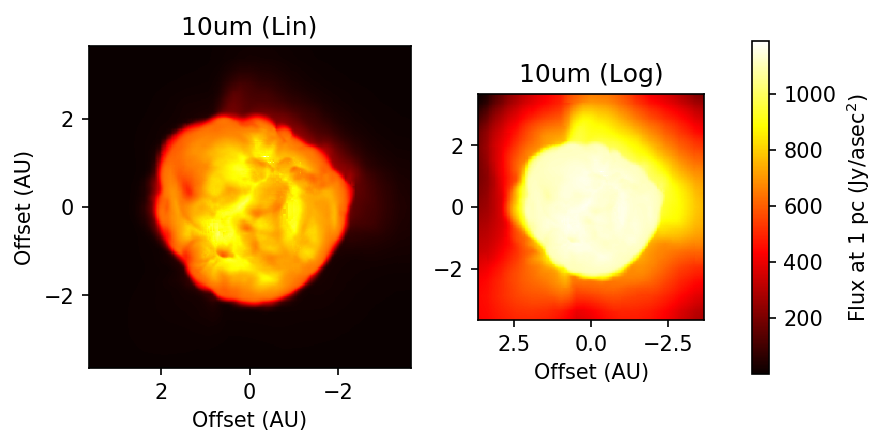

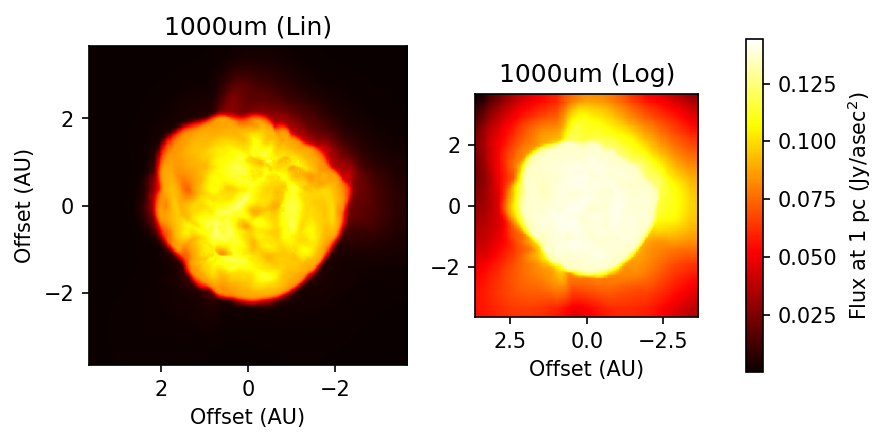

In [37]:
import analyze_r3d_functions as a3d

a3d.plot_images(
    path='../r3dresults/duststar_tests_4/',
    images=['image_10um.out','image_1000um.out'],
    distance=1
)

/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:542: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:560: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


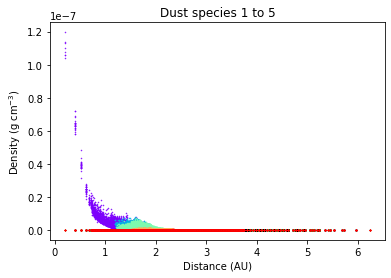

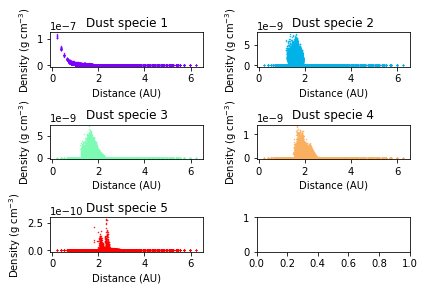

In [2]:
import analyze_r3d_functions as a3d

a3d.plot_alldensity_radius(
    density_path='../r3dresults/duststar_tests_4/dust_density.inp',
    grid_path='../r3dresults/duststar_tests_4/grid_distances.csv',
    amr_path='../r3dresults/duststar_tests_4/amr_grid.inp'
)

/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:664: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:682: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


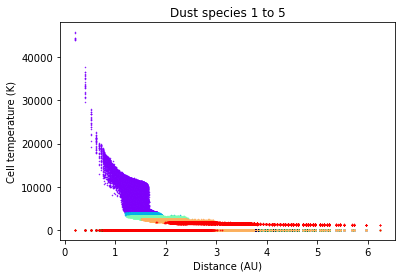

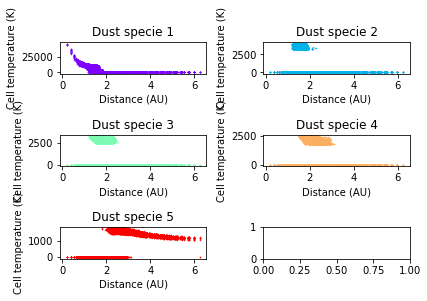

In [3]:
import analyze_r3d_functions as a3d

a3d.plot_alltemperature_radius(
    temperature_path='../r3dresults/duststar_tests_4/dust_temperature.dat',
    grid_path='../r3dresults/duststar_tests_4/grid_distances.csv',
    amr_path='../r3dresults/duststar_tests_4/amr_grid.inp'
)

Extracting species star1
Extracting species star2
Extracting species star3
Extracting species star4
Extracting species star5


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:789: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[nn].set(
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:788: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[nn].plot(wavelengths,kappas[counter + nn])
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:797: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


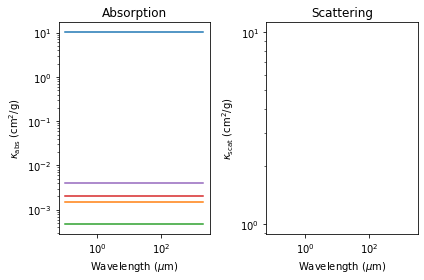

In [4]:
import analyze_r3d_functions as a3d

a3d.plot_allkappa(
    path='../r3dresults/duststar_tests_4'
    #path='../r3dsims/opacities'
)





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d


staropactemp = np.loadtxt(
    '../r3dresults/duststar_tests_4/star_opacities_bins.dat'
)

Ncells = 735792
staropac = np.zeros(Ncells)
startemp = np.zeros(Ncells)

for nbin in range(5):

    Ncells,Nspecies,temp = a3d.load_temperature(
            path='../r3dresults/duststar_tests_4/dust_temperature.dat',
            numb_specie=nbin+1
        )
    startemp += temp

    staropac += staropactemp[
        Ncells*nbin:Ncells*(nbin+1)
    ]


griddistances = a3d.load_griddistances(
        gridpath='../r3dresults/duststar_tests_4/grid_distances.csv',
        amrpath='../r3dresults/duststar_tests_4/amr_grid.inp', 
    )
griddistances /= 1.49598e13





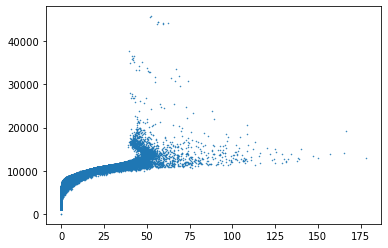

In [6]:
plt.plot(staropac,startemp,'.',markersize=1)



In [34]:
import numpy as np
import analyze_r3d_functions as a3d

wavelengths, nwave = a3d.load_wavelengthgrid(
    path='../r3dresults/duststar_tests_3/wavelength_micron.inp')


test = np.zeros((nwave,3))

test[:,0] = wavelengths
test[:,1] = 1.0

np.savetxt('../r3dresults/duststar_tests_3/dustkappa_star.inp',test,fmt='%.5f')



In [1]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np

dtau,dx = a3d.compute_opticalthick(path='../r3dresults/duststar_tests_4/')

griddistances = a3d.load_griddistances(
    gridpath='../r3dresults/duststar_tests_4/grid_distances.csv', 
    amrpath='../r3dresults/duststar_tests_4/amr_grid.inp'
)
griddistances /= 1.49598e13
dx /= 1.49598e13

plt.plot(dx,dtau)
plt.yscale('log')
plt.plot(dx,np.linspace(1,1,100),'g--')


densities shape: (735792,)
Extracting species number 1: star1
Extracting species number 2: star2
Extracting species number 3: star3
Extracting species number 4: star4
Extracting species number 5: star5
kappas shape: (100,)


ValueError: operands could not be broadcast together with shapes (100,) (735792,) 

In [8]:
import analyze_r3d_functions as a3d

specie_name,wavelengths,kappadata = a3d.load_onekappa(
            specie_number=1,
            path='../r3dresults/duststar_tests_4/'
        )


np.array(kappadata)[0]


Extracting species number 1: star1


array([10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30508584,
       10.30508584, 10.30508584, 10.30508584, 10.30508584, 10.30

Extracting species number 1: star1
Extracting species number 2: star2
Extracting species number 3: star3
Extracting species number 4: star4
Extracting species number 5: star5


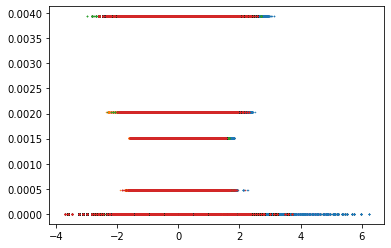

In [2]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
kappas = a3d.compute_opticalthick(path='../r3dresults/duststar_tests_4/')
griddistances = a3d.load_griddistances(
    gridpath='../r3dresults/duststar_tests_4/grid_distances.csv', 
    amrpath='../r3dresults/duststar_tests_4/amr_grid.inp'
)
griddistances /= 1.49598e13

plt.plot(griddistances[:,0],kappas,'.',markersize=1)